In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
spanish_filepath = '/Users/mihirgupta/Downloads/spanish_bank.csv'
df = pd.read_csv(spanish_filepath)

In [138]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


There are 10 columns in the dataset, but the two columns that specify zipcode only
contain one value and should be dropped.

In [139]:
df['zipcodeOri'].describe()

count      594643
unique          1
top       '28007'
freq       594643
Name: zipcodeOri, dtype: object

In [140]:
df['zipMerchant'].describe()

count      594643
unique          1
top       '28007'
freq       594643
Name: zipMerchant, dtype: object

In [141]:
df.drop(['zipcodeOri', 'zipMerchant'], axis=1)
df.isnull().values.any()

False

There are 8 columns remaining. Step appears to be represent the time a transaction occurred since the first transaction was made. According to the paper published on researchgate.net, the Age column refers to a categorized age:

0 -->  <=18
1 --> 19-25
2 --> 26-35
3 --> 36-45
4 --> 46-55
5 --> 56-65
6 --> >65
U --> Unknown

The Customer column is a unique ID assigned to each customer. There are customers in the dataset who have made multiple purchases, so this column may be useful to us. Gender represents the gender of a customer: 
'M' -> Male
'F' -> Female
'E' -> Enterprise
'U' -> Unknown

The Merchant column refers to a unique ID assigned to each merchant. There are merchants who have facilitated more than one transaction in the dataset, so this column may be useful to us.

Category and amount columns are self-evident, category represents the consumer category to which the purchased item belongs to, and amount refers to the numeric value of the purchase (likely in euros). 

The fraud column is categorized as follows: 0 is indicative of no fraud, 1 means the transaction was a fraud.

Additionally, there are no null values in the dataset, so no values seem to missing. This makes sense as the dataset we are dealing with is simulated.

In [34]:
df['step'].describe()

count    594643.000000
mean         94.986827
std          51.053632
min           0.000000
25%          52.000000
50%          97.000000
75%         139.000000
max         179.000000
Name: step, dtype: float64

This column represents the number of days since the first transaction. Since the maximum value is 179 days, the dataset compiled data for a period of roughly 6 months. 

In [35]:
df['customer'].describe()

count            594643
unique             4112
top       'C1978250683'
freq                265
Name: customer, dtype: object

Out of 594,643 rows, there are only 4,112 unique customers. This means that many of the same customers have repeat transactions, the most of which executing 265 transactions. 

In [36]:
df['age'].describe()

count     594643
unique         8
top          '2'
freq      187310
Name: age, dtype: object

The most common agegroup for which this dataset has transaction data for is the 26-35 bracket. Overall, all 8 categories are represented in the dataset.

In [37]:
df['gender'].describe()

count     594643
unique         4
top          'F'
freq      324565
Name: gender, dtype: object

Transactions by female customers are the most common in this dataset. 

In [38]:
df['merchant'].describe()

count            594643
unique               50
top       'M1823072687'
freq             299693
Name: merchant, dtype: object

There are only 50 unique merchants in the dataset. This may be a result of the simulated nature of this dataset, as well as the compact geographic zone this data describe (all merchants were in the same zip code).

In [39]:
df['category'].describe()

count                  594643
unique                     15
top       'es_transportation'
freq                   505119
Name: category, dtype: object

There are 15 categories of transactions, the most common of which being transportation. Overall, all 15 categories delineated in the research paper are represented in this data set.

In [40]:
df['amount'].describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

The dataset includes purchases that have been for 0 euros, which need to be addressed. It is possible these are similar to a preauthorization charge, but must be investigated. The average purchase was for ~38 euros, which is a significant price.

In [41]:
(list(df.fraud).count(1)) / len(df.fraud)

0.012108105199254007

Only 1.2108% of transactions in the dataset are fraud, meaning the data is highly unbalanced.

***Determining Additional Variables and Visualizing Characteristics of Fraudulent Tranasctions***

In [45]:
df_frauds = df[df['fraud'] ==1]

**ATTEMPTING TO ASSIGN EACH CUSTOMER ID A FRAUD SCORE**

In [177]:
def get_fraud_scores(category):
    fraud_scores = { i : 0 for i in df[category].unique() }
    fraud_dict = df_frauds[category].value_counts().to_dict()
    total_dict = df[category].value_counts().to_dict()
    final_fraud = dict((v,k) for k,v in fraud_dict.items())

    for key in fraud_scores: 
        if key in fraud_dict:
            fraud_scores[key] = fraud_dict[key]/total_dict[key]
    return fraud_scores

In [184]:
customer_fraud_dict = get_fraud_scores('customer')
merchant_fraud_dict = get_fraud_scores('merchant')

Now that we finally have a fraud percentage for each customer, we must insert our new datapoint into our dataset so we can use it for future analysis. **I'm having trouble transferring this information into the existing dataset, but I did generalize my approach into forming a method to gather this data.**

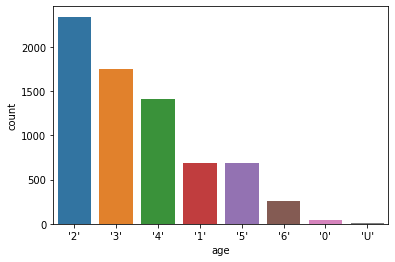

In [207]:
sns.countplot(data=df_frauds, x='age', order=df_frauds.age.value_counts().index)

'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64

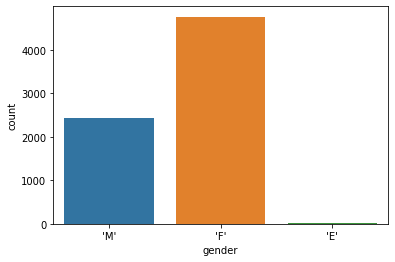

In [210]:
sns.countplot(x='gender', data=df_frauds) 
df.gender.value_counts()

Demographics wise, we can see that the frauds are most prevalent in the 26-35 age bracket. Additionally, women commit a significantly more amount of fraud compared to men. While we do have more data for female purchasers, it does not explain how women have committed almost **double** the fraud men have.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

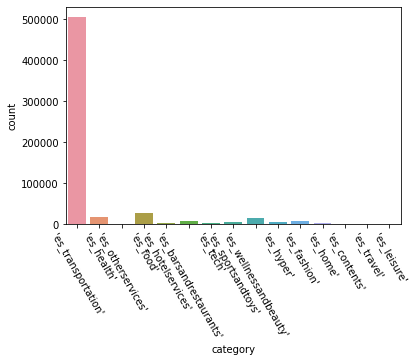

In [189]:
sns.countplot(x='category', data=df) #purchases by category for ALL data 
plt.xticks(rotation=-60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

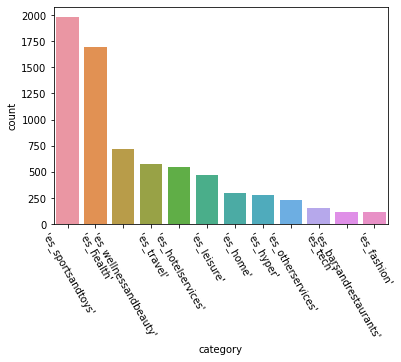

In [211]:
sns.countplot(x='category', data=df_frauds, order=df_frauds.category.value_counts().index) #purchases by category for all FRAUDULENT data 
plt.xticks(rotation=-60)

The most common categories for fraud are health and sports/toys. This is in stark contrast to the dataset as a whole, where the most common category is transportation. **In fact, not a single transaction in the transportation category was labeled as fraud.**

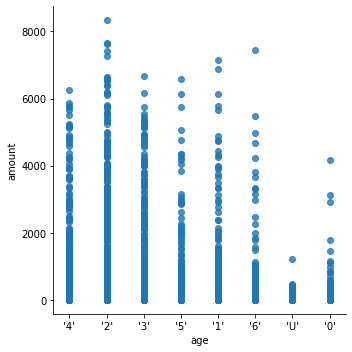

In [205]:
sns.lmplot('age', 'amount', data=df, fit_reg=False) #age vs amount for ALL data

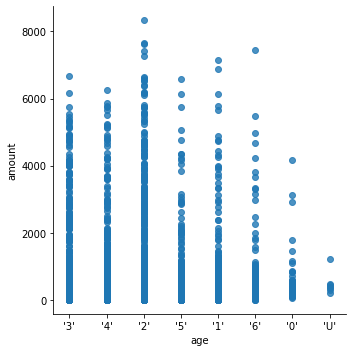

In [206]:
sns.lmplot('age', 'amount', data=df_frauds, fit_reg=False) #age vs amount for all FRAUDULENT data

As expected, most fraud occurs at the lower price levels. However, there is sustained fraud occurring at prices up to 4000 euros. There is a steep drop off in the commonality of fraud after the 6000 euro price point, however that may be affected by the fact that purchases at this level are simply less common.